In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [30]:
#reading the data as data fram and convert it to numpy array
df_data = pd.read_csv(r'breast_cancer.csv')

np_data = df_data.values

In [31]:
#spliting data into train and test sets
np_data_train = np_data[:500,:]
np_data_test = np_data[500:,:]


The accuracy of SVM classifier for the validation set is: 90.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 98.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 94.00 %
The accuracy of SVM classifier for the validation set is: 88.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 90.00 %
The accuracy of SVM classifier for the validation set is: 94.00 %
The accuracy of SVM classifier for the validation set is: 98.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accura

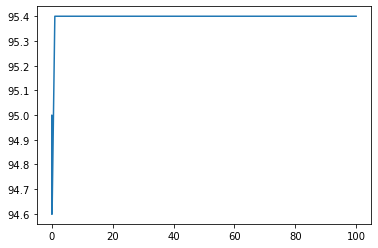

In [32]:
##Part 1.1
# C array
C = [0.001,0.01,0.1,1,10,100]

#Creating a cound
count = -1

#Creating a np array in the size of C,10
matrix = np.ones((6,10))

avarage_acc_arr = np.ones((6))

#Creating a for loop to find the C which gives the best accuracy from the cross validation
for j in C:
    
    #incrementing the count
    count +=1
    
    #slicing the validations of the data 10 time by rolling
    for i in range(10):
        
        #Spliting the data and label into train and validation 
        np_data_validation = np_data_train[:50,:]
        np_data_val_train = np_data_train [50:,:]
    
        np_data_validation_data = np_data_validation[:,:-1]
        np_data_val_train_data = np_data_val_train[:,:-1]
    
        np_data_validation_label = np_data_validation[:,-1]
        np_data_val_train_label = np_data_val_train[:,-1]
    
        #Implementing the SVM classifier to the train set
        classify_svm = svm.SVC(C=j,kernel = 'linear')
        classify_svm.fit(np_data_val_train_data, np_data_val_train_label.ravel(),)
    
        #Reshaping the label set
        np_data_val_train_label = np_data_val_train_label.reshape(np_data_val_train_label.size,1)
        
        #Doing the prediction by using svm.predict and print he accuracy
        svm_prediction = classify_svm.predict(np_data_validation_data)
        print("The accuracy of SVM classifier for the validation set is:","{:.2f}".format((metrics.accuracy_score(np_data_validation_label, svm_prediction,sample_weight= None)*100)),'%')
    
        #print(np_data_train[:10,:])
        np_data_train= np.roll(np_data_train,50, axis = 0)
        
        #appending the accuracy into the matrix
        matrix[count,i] = (metrics.accuracy_score(np_data_validation_label, svm_prediction,sample_weight= None)*100)
    
    #Finding the average for every C to find the best C
    sum_of_row = 0
    
    for i in range(10):
        sum_of_row += matrix[count,i]
    avarage_acc =  sum_of_row/10
    avarage_acc_arr[count] = avarage_acc
    #avarage_acc_arr.append(avarage_acc)


print('The avarage accuracy for every C:',avarage_acc_arr)
print('C values are: ',C)

#Finding the index of the avarages to find the best C index
best_C_index = np.argmax(avarage_acc_arr)
print('Best C to be used is: ',C[best_C_index])
plt.figure()
plt.plot(C,avarage_acc_arr)

#Testing
np_data_train_ = np_data_train[:,:-1]
np_data_label = np_data_train[:,-1]

np_data_test_ = np_data_test[:,:-1]
np_data_test_label = np_data_test[:,-1]

print(np_data_test.shape)

#Implementing the SVM classifier to the test set
classify_svm = svm.SVC(C = C[best_C_index], kernel = 'linear')
classify_svm.fit(np_data_train_, np_data_label.ravel(),)
    
#Reshaping the label set
#np_data_val_train_label = np_data_val_train_label.reshape(np_data_val_train_label.size,1)
        
#Doing the prediction by using svm.predict and print he accuracy
svm_prediction_ = classify_svm.predict(np_data_test_)
print("The accuracy of SVM classifier for the validation set is:","{:.2f}".format((metrics.accuracy_score(np_data_test_label, svm_prediction_,sample_weight= None)*100)),'%')

#finding the confusion matrix, recall, specifitiy and precision
tn , fp , fn , tp = confusion_matrix(np_data_test_label,svm_prediction_).ravel()
recall = tn/(tn+tp)
spec = fp/(fp+fn)
prec = tn/(tn+fn)

#Printing all of the wanted things
print('True negative: ',tn)
print('False positive: ',fp)
print('False negative: ',fn)
print('True positive: ',tp)
print("The accuracy of SVM classifier for the test set is:","{:.2f}".format((metrics.accuracy_score(np_data_test_label, svm_prediction_,sample_weight= None)*100)),'%')
print('Recall is: ',recall)
print('Precision is: ',prec)
print('specifitiy is: ',spec)
print('F1 score is: ',(2 * recall * prec) / ( recall+prec))
print('F2 score is: ',(5 * recall*prec) / (recall+4 * prec))


In [33]:
# C array
C = [0.001,0.01,0.1,1,10,100]
gamma = [0.625,0.125,0.5,1,2]

#Creating a cound
count = -1

#Creating a np array in the size of C,10
matrix = np.ones((5,10))

#creating an array for finding avarage accuracy
avarage_acc_arr = np.ones((5))

#Creating a for loop to find the C which gives the best accuracy from the cross validation
for j in gamma:
    
    #incrementing the count
    count +=1
    
    #slicing the validations of the data 10 time by rolling
    for i in range(10):
        
        #Spliting the data and label into train and validation 
        np_data_validation = np_data_train[:50,:]
        np_data_val_train = np_data_train [50:,:]
    
        np_data_validation_data = np_data_validation[:,:-1]
        np_data_val_train_data = np_data_val_train[:,:-1]
    
        np_data_validation_label = np_data_validation[:,-1]
        np_data_val_train_label = np_data_val_train[:,-1]
    
        #Implementing the SVM classifier to the train set
        classify_svm = svm.SVC(C = C[best_C_index],kernel = 'rbf',gamma=j)
        classify_svm.fit(np_data_val_train_data, np_data_val_train_label.ravel(),)
    
        #Reshaping the label set
        np_data_val_train_label = np_data_val_train_label.reshape(np_data_val_train_label.size,1)
        
        #Doing the prediction by using svm.predict and print he accuracy
        svm_prediction = classify_svm.predict(np_data_validation_data)
        print("The accuracy of SVM classifier for the validation set is:","{:.2f}".format((metrics.accuracy_score(np_data_validation_label, svm_prediction,sample_weight= None)*100)),'%')
    
        #print(np_data_train[:10,:])
        np_data_train= np.roll(np_data_train,50, axis = 0)
        
        #appending the accuracy into the matrix
        matrix[count,i] = (metrics.accuracy_score(np_data_validation_label, svm_prediction,sample_weight= None)*100)
    
    #Finding the average for every C to find the best C
    sum_of_row = 0
    for i in range(10):
        sum_of_row += matrix[count,i]
    avarage_acc =  sum_of_row/10
    avarage_acc_arr[count] = avarage_acc
    



#Finding the index of the avarages to find the best gamma index
best_gamma_index = np.argmax(avarage_acc_arr)

print('The avarage accuracy for every gamma:',avarage_acc_arr)
print('gamma values are: ',gamma)
print('Best gamma to be used is: ',gamma[best_gamma_index])

The accuracy of SVM classifier for the validation set is: 90.00 %
The accuracy of SVM classifier for the validation set is: 92.00 %
The accuracy of SVM classifier for the validation set is: 78.00 %
The accuracy of SVM classifier for the validation set is: 86.00 %
The accuracy of SVM classifier for the validation set is: 86.00 %
The accuracy of SVM classifier for the validation set is: 88.00 %
The accuracy of SVM classifier for the validation set is: 86.00 %
The accuracy of SVM classifier for the validation set is: 94.00 %
The accuracy of SVM classifier for the validation set is: 88.00 %
The accuracy of SVM classifier for the validation set is: 94.00 %
The accuracy of SVM classifier for the validation set is: 92.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 94.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accuracy of SVM classifier for the validation set is: 96.00 %
The accura

In [34]:
#Testing
np_data_train_ = np_data_train[:,:-1]
np_data_label = np_data_train[:,-1]

np_data_test_ = np_data_test[:,:-1]
np_data_test_label = np_data_test[:,-1]


#Implementing the SVM classifier to the test set
classify_svm = svm.SVC(C = C[best_C_index], kernel = 'rbf', gamma=gamma[best_gamma_index])
classify_svm.fit(np_data_train_, np_data_label.ravel(),)
    
#Reshaping the label set
#np_data_val_train_label = np_data_val_train_label.reshape(np_data_val_train_label.size,1)
        
#Doing the prediction by using svm.predict and print he accuracy
svm_prediction_ = classify_svm.predict(np_data_test_)
print("The accuracy of SVM classifier for the validation set is:","{:.2f}".format((metrics.accuracy_score(np_data_test_label, svm_prediction_,sample_weight= None)*100)),'%')


The accuracy of SVM classifier for the validation set is: 98.49 %


In [35]:
#finding the confusion matrix, recall, specifitiy and precision
tn , fp , fn , tp = confusion_matrix(np_data_test_label,svm_prediction_).ravel()
recall = tn/(tn+tp)
spec = fp/(fp+fn)
prec = tn/(tn+fn)

#Printing all of the wanted things
print('True negative: ',tn)
print('False positive: ',fp)
print('False negative: ',fn)
print('True positive: ',tp)
print("The accuracy of SVM classifier for the test set is:","{:.2f}".format((metrics.accuracy_score(np_data_test_label, svm_prediction_,sample_weight= None)*100)),'%')
print('Recall is: ',recall)
print('Precision is: ',prec)
print('specifitiy is: ',spec)
print('F1 score is: ',(2 * recall * prec) / ( recall+prec))
print('F2 score is: ',(5 * recall*prec) / (recall+4 * prec))

True negative:  152
False positive:  3
False negative:  0
True positive:  44
The accuracy of SVM classifier for the test set is: 98.49 %
Recall is:  0.7755102040816326
Precision is:  1.0
specifitiy is:  1.0
F1 score is:  0.8735632183908045
F2 score is:  0.811965811965812
